In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aux_functions as aux

sns.set_theme()

In [2]:
df = pd.read_csv('../data.csv')
print('Amostras: {} \nColunas: {}'.format(df.shape[0], df.shape[1]))

Amostras: 880 
Colunas: 58


### Provando a precisão da velocidade obtida pelo FFT do tacômetro

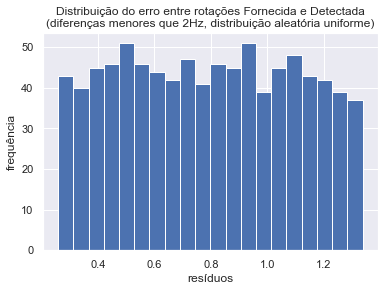

In [3]:
# distribuição do erro
plt.hist(df['rotacao']-df['fundamental'],20)
plt.title('Distribuição do erro entre rotações Fornecida e Detectada'+ 
          '\n(diferenças menores que 2Hz, distribuição aleatória uniforme)')
plt.xlabel('resíduos')
plt.ylabel('frequência')
plt.show()

# remove coluna de 'rotacao', que é redundante con 'fundamental'
df.pop('rotacao');

In [4]:
# mapeia velocidade em intervalos decimais
decimals = (pd.cut(df['fundamental'], bins=[0,15,25,35,45,55,65], labels=False)+1)*10
df.insert(3, 'fundamental_aprox', decimals)

# filtra velocidades acima de 30 Hz
df = df.query('fundamental > 30')

# Organizando as features por categoria e por eixo

In [20]:
# mapeia cada categoria de feature para suas instâncias
columns = list(df.columns)
feat_type = {
    'harmonico 1': [col for col in columns if '1h' in col],
    'harmonico 2': [col for col in columns if '2h' in col],
    'harmonico 3': [col for col in columns if '3h' in col],
    'entropia':    [col for col in columns if 'entr' in col],
    'curtose':     [col for col in columns if 'kurt' in col],
    'media':       [col for col in columns if 'mean' in col],
    'RMS':         [col for col in columns if '1_rms' in col or '2_rms' in col or 'e_rms' in col],
    'RMS da vel':  [col for col in columns if 'vel_rms' in col],
    'fase':        [col for col in columns if 'phase' in col],
    # 'descritivos': ['defeito', severidade, 'rotacao', 'fundamental'],
}

# faz o mapeamento inverso, do nome de cada feature para a sua categoria
feat_to_type = {v[i]: k for k, v in feat_type.items() for i in range(len(v))}

# mostra cada feature
listed =[]
for k,i in feat_type.items():
    k = k +': '
    print('{:>13}'.format(k), i)
    listed.extend(i)

# mosta todas as outras colunas
print('{:>13}'.format('descritivos: '), [i for i in df.columns if i not in listed])

harmonico 1:  ['ax1_1h', 'ax2_1h', 'microfone_1h', 'rad1_1h', 'rad2_1h', 'tg1_1h', 'tg2_1h']
harmonico 2:  ['ax1_2h', 'ax2_2h', 'microfone_2h', 'rad1_2h', 'rad2_2h', 'tg1_2h', 'tg2_2h']
harmonico 3:  ['ax1_3h', 'ax2_3h', 'microfone_3h', 'rad1_3h', 'rad2_3h', 'tg1_3h', 'tg2_3h']
   entropia:  ['ax1_entr', 'ax2_entr', 'microfone_entr', 'rad1_entr', 'rad2_entr', 'tg1_entr', 'tg2_entr']
    curtose:  ['ax1_kurt', 'ax2_kurt', 'microfone_kurt', 'rad1_kurt', 'rad2_kurt', 'tg1_kurt', 'tg2_kurt']
      media:  []
        RMS:  ['ax1_rms', 'ax2_rms', 'microfone_rms', 'rad1_rms', 'rad2_rms', 'tg1_rms', 'tg2_rms']
 RMS da vel:  ['ax1_vel_rms', 'ax2_vel_rms', 'rad1_vel_rms', 'rad2_vel_rms', 'tg1_vel_rms', 'tg2_vel_rms']
       fase:  ['ax1_phase', 'ax2_phase', 'rad1_phase', 'rad2_phase', 'tg1_phase', 'tg2_phase']
descritivos:  ['defeito', 'severidade', 'fundamental', 'fundamental_aprox']


In [6]:
# mapeia cada eixo de captação para suas instâncias
eixo = {
    'axial':     [col for col in columns if 'ax' in col],
    'radial':    [col for col in columns if 'rad' in col],
    'tangente':  [col for col in columns if 'tg' in col],
    'microfone': [col for col in columns if 'mic' in col],
}

# faz o mapeamento inverso, do nome de cada feature para o seu eixo
feat_to_eixo = {v[i]: k for k, v in eixo.items() for i in range(len(v))}

# mostra cada feature
listed =[]
for k,i in eixo.items():
    k = k +': '
    print('{:>11}'.format(k), i[:7], '\n           ', i[7:], '\n')
    listed.extend(i)

    axial:  ['ax1_1h', 'ax1_2h', 'ax1_3h', 'ax1_entr', 'ax1_kurt', 'ax1_phase', 'ax1_rms'] 
            ['ax1_vel_rms', 'ax2_1h', 'ax2_2h', 'ax2_3h', 'ax2_entr', 'ax2_kurt', 'ax2_phase', 'ax2_rms', 'ax2_vel_rms'] 

   radial:  ['rad1_1h', 'rad1_2h', 'rad1_3h', 'rad1_entr', 'rad1_kurt', 'rad1_phase', 'rad1_rms'] 
            ['rad1_vel_rms', 'rad2_1h', 'rad2_2h', 'rad2_3h', 'rad2_entr', 'rad2_kurt', 'rad2_phase', 'rad2_rms', 'rad2_vel_rms'] 

 tangente:  ['tg1_1h', 'tg1_2h', 'tg1_3h', 'tg1_entr', 'tg1_kurt', 'tg1_phase', 'tg1_rms'] 
            ['tg1_vel_rms', 'tg2_1h', 'tg2_2h', 'tg2_3h', 'tg2_entr', 'tg2_kurt', 'tg2_phase', 'tg2_rms', 'tg2_vel_rms'] 

microfone:  ['microfone_1h', 'microfone_2h', 'microfone_3h', 'microfone_entr', 'microfone_kurt', 'microfone_rms'] 
            [] 



O primeiro procedimento é separar os conjuntos.

In [7]:
# conta número de samples para cada defeito
df['defeito'].value_counts()

desbalanceamento             205
desalinhamento_vertical      187
desalinhamento_horizontal    123
normal                        31
Name: defeito, dtype: int64

Será averiguada a relvância da normalização das variáveis em relação à velocidade de rotação de cada ensaio.

In [8]:
# gera cópia profunda para alterar os valores internos sem corromper originais
df_norm = df.copy(deep=True)

# normaliza cada um por 1/fundamental
df_norm.iloc[:, 4:] = df.iloc[:, 4:].div(df['fundamental'], axis=0)

In [9]:
df.query("defeito == 'desbalanceamento' or defeito == 'normal'")

,defeito,severidade,fundamental,fundamental_aprox,ax1_1h,ax1_2h,ax1_3h,ax1_entr,ax1_kurt,ax1_phase,...,tg1_rms,tg1_vel_rms,tg2_1h,tg2_2h,tg2_3h,tg2_entr,tg2_kurt,tg2_phase,tg2_rms,tg2_vel_rms
516,desbalanceamento,10.0,31.0620,30,34.643874,2.021453,7.091943,2.870287,-0.390136,75.619529,...,10.445141,0.508142,3.957175,3.040141,2.697298,2.418218,0.166324,-29.892742,38.519387,1.470211
517,desbalanceamento,10.0,32.0640,30,27.072643,2.042123,6.123221,2.820407,-0.428376,68.546017,...,11.535725,0.545614,5.053915,1.804922,2.337073,2.274862,-0.025470,-46.660455,33.347258,2.553773
518,desbalanceamento,10.0,32.8656,30,31.502841,2.032717,6.330173,2.815419,-0.382300,77.481904,...,13.380112,0.696425,4.712582,2.456256,2.562648,2.398995,-0.289450,-56.008639,38.561358,2.067389
519,desbalanceamento,10.0,33.6672,30,23.090753,2.064448,5.398753,2.808607,-0.441766,72.738200,...,13.339474,0.690907,4.860469,2.120123,2.331579,2.629407,-0.506894,-49.201057,51.914299,1.910808
520,desbalanceamento,10.0,35.2704,40,12.603681,0.895151,7.101716,2.808927,-0.274797,82.334628,...,14.438661,0.716264,8.561404,2.989397,2.235500,2.385618,0.331198,-64.820680,37.268148,2.451055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,normal,0.0,56.7132,60,7.739634,7.711959,6.131490,2.477337,0.048670,92.985568,...,18.249959,0.527572,8.387590,1.686581,3.316573,2.301806,0.186492,17.004031,34.372586,0.981479
876,normal,0.0,57.5148,60,5.185984,7.770882,4.873502,2.488138,0.044559,91.810913,...,18.695470,0.558485,5.632926,1.833460,2.565040,2.432456,0.061836,18.425003,39.727396,0.969856
877,normal,0.0,58.3164,60,6.357986,6.400941,7.500388,2.498440,-0.025516,91.014527,...,19.275803,0.534440,7.098469,1.303592,3.313748,2.685209,-0.099084,16.149768,50.332619,1.029314
878,normal,0.0,59.1180,60,8.046938,7.237078,6.231257,2.485025,0.200584,92.820993,...,19.976743,0.525599,8.159955,2.185100,2.184384,2.797251,-0.587838,14.656560,58.233539,1.074776


In [10]:
# separa cada tipo de defeito em um dataframe específico
df_desbal      =      df.query("defeito == 'desbalanceamento' or defeito == 'normal'")
df_des_ve      =      df.query("defeito == 'desalinhamento_vertical' or defeito == 'normal'")
df_des_ho      =      df.query("defeito == 'desalinhamento_horizontal' or defeito == 'normal'")

# cria dicionário que aponta o nome do defeito para o seu DataFrame
fault_to_df = {
    'desbalanceamento'         :   df_desbal,
    'desalinhamento_vertical'  :   df_des_ve,
    'desalinhamento_horizontal':   df_des_ho,
}


# repete as operações para df normalizado
df_desbal_norm = df_norm.query("defeito == 'desbalanceamento' or defeito == 'normal'")
df_des_ve_norm = df_norm.query("defeito == 'desalinhamento_vertical' or defeito == 'normal'")
df_des_ho_norm = df_norm.query("defeito == 'desalinhamento_horizontal' or defeito == 'normal'")

fault_to_normalized_df = {
    'desbalanceamento'         :   df_desbal_norm,
    'desalinhamento_vertical'  :   df_des_ve_norm,
    'desalinhamento_horizontal':   df_des_ho_norm,
}

In [11]:
# descarta a coluna 'defeito' de cada df, pois é informação redundante
for _, dfram in fault_to_df.items():
    dfram.pop('defeito')
for _, dfram in fault_to_normalized_df.items():
    dfram.pop('defeito')
    
fault_to_df['desalinhamento_vertical'].head()

,severidade,fundamental,fundamental_aprox,ax1_1h,ax1_2h,ax1_3h,ax1_entr,ax1_kurt,ax1_phase,ax1_rms,...,tg1_rms,tg1_vel_rms,tg2_1h,tg2_2h,tg2_3h,tg2_entr,tg2_kurt,tg2_phase,tg2_rms,tg2_vel_rms
216,0.51,30.8616,30,42.422895,2.512441,8.387080,3.016152,-0.619013,77.450075,74.257768,...,15.199949,0.428137,4.201373,1.449230,1.774631,2.279243,-0.383373,139.973518,33.537125,1.069617
217,0.51,31.6632,30,29.888158,2.458242,7.048565,3.022772,-0.500180,78.844814,73.990775,...,16.368829,0.455618,5.668928,1.905421,2.241102,2.321346,-0.124697,144.073350,34.789719,2.625985
218,0.51,32.6652,30,35.780928,2.477278,7.579133,2.938123,-0.460759,78.313551,67.979401,...,16.723127,0.409787,6.475905,1.887092,2.380833,2.351824,-0.097281,139.034589,35.845142,2.170305
219,0.51,33.4668,30,5.838111,1.021800,6.645258,2.871594,-0.595960,76.089765,63.904903,...,17.782745,0.483622,4.448426,2.432198,1.061538,2.372517,-0.545118,149.712953,36.978003,1.913125
220,0.51,34.4688,30,8.415510,1.529479,7.023171,2.887778,-0.470194,74.403832,64.236065,...,19.265862,0.485337,6.844935,1.737961,1.587448,2.223567,-0.271762,138.855673,31.544688,1.595535


# Análise de correlação

## Desbalanceamento

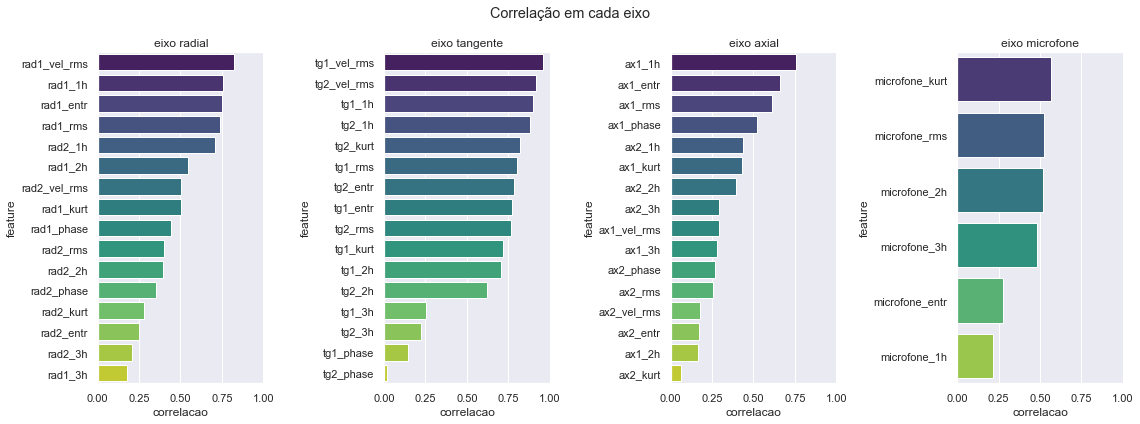

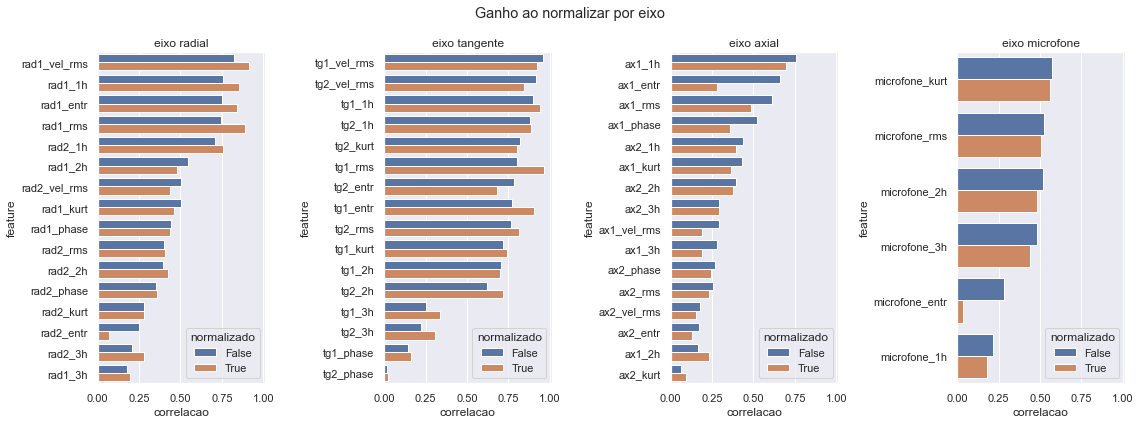

In [12]:
corr_df = aux.gera_corr_df('desbalanceamento', df_desbal, df_desbal_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

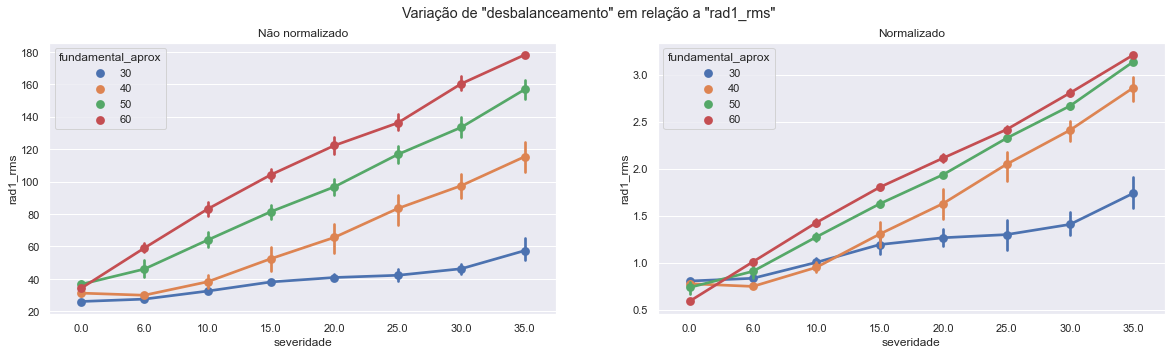

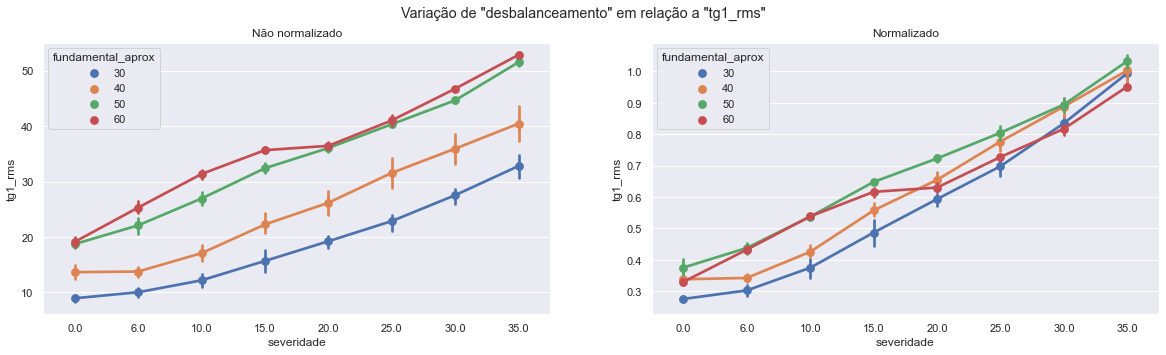

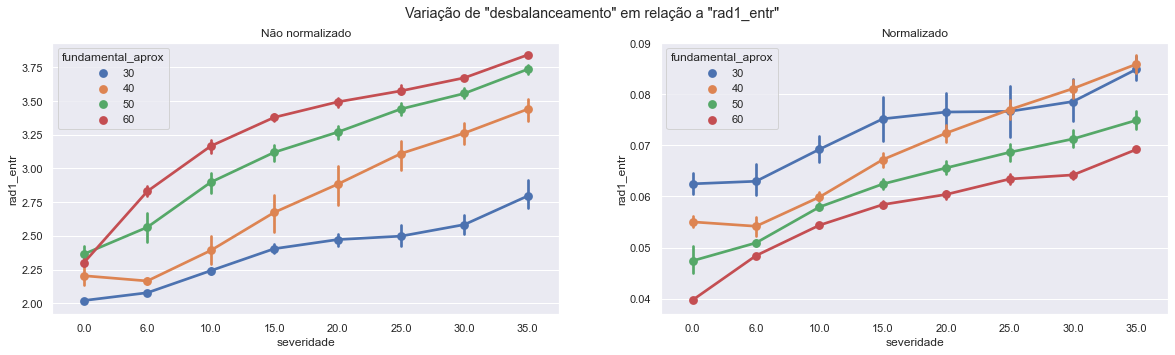

In [13]:
aux.plot_detailed_comparisson('rad1_rms', 'desbalanceamento', df_desbal, df_desbal_norm)
aux.plot_detailed_comparisson('tg1_rms', 'desbalanceamento', df_desbal, df_desbal_norm)
aux.plot_detailed_comparisson('rad1_entr', 'desbalanceamento', df_desbal, df_desbal_norm)

## Desalinhamento vertical

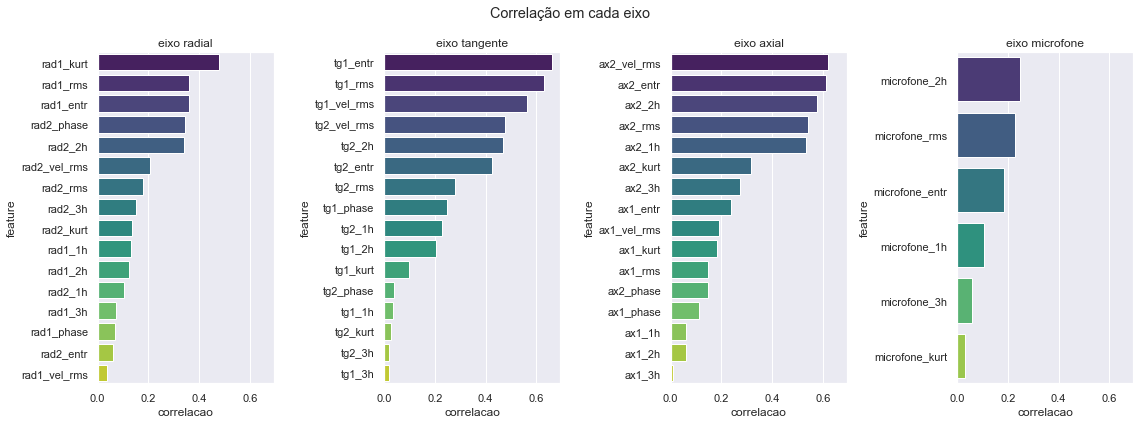

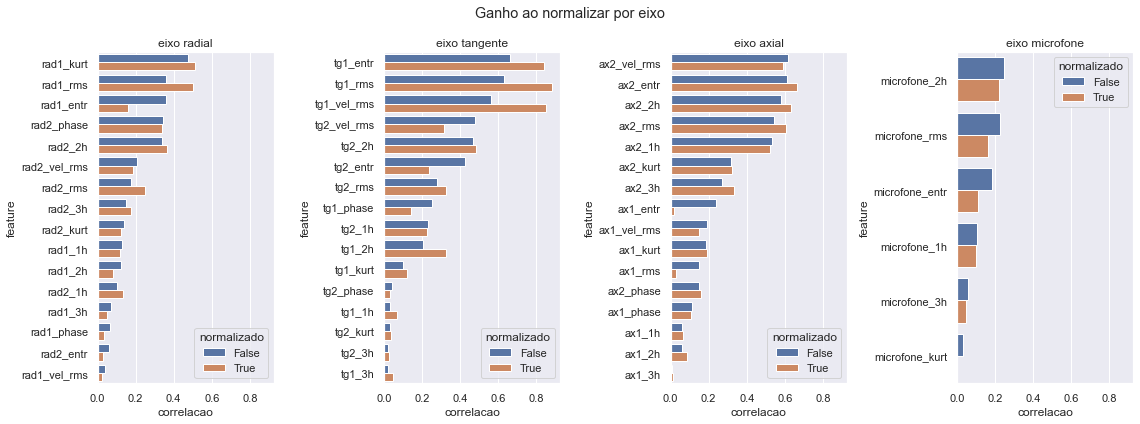

In [14]:
corr_df = aux.gera_corr_df('desalinhamento_vertical', df_des_ve, df_des_ve_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

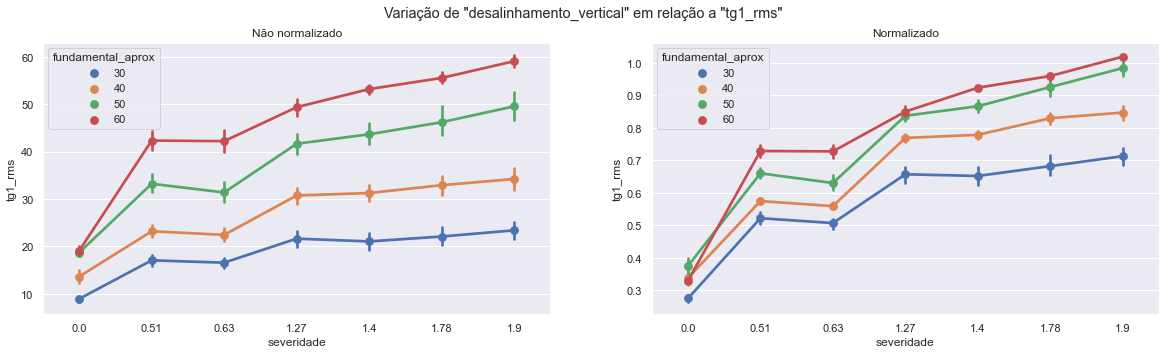

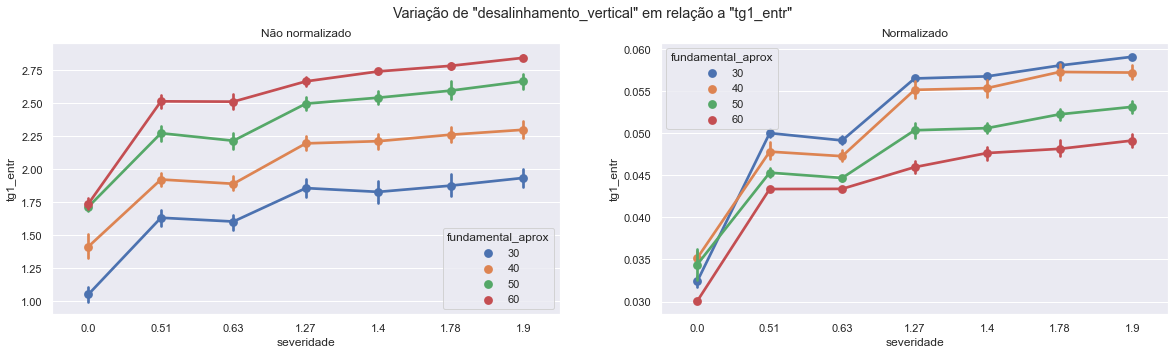

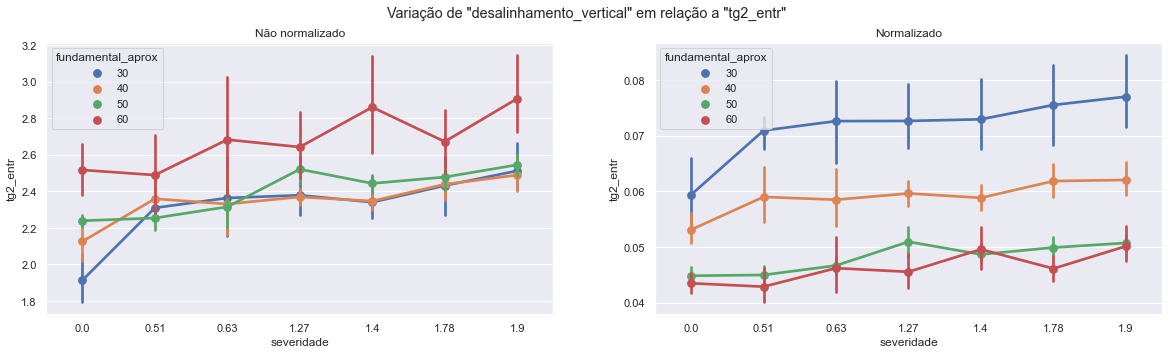

In [15]:
aux.plot_detailed_comparisson('tg1_rms', 'desalinhamento_vertical', df_des_ve, df_des_ve_norm)
aux.plot_detailed_comparisson('tg1_entr', 'desalinhamento_vertical', df_des_ve, df_des_ve_norm)
aux.plot_detailed_comparisson('tg2_entr', 'desalinhamento_vertical', df_des_ve, df_des_ve_norm)

## Desalinhamento horizontal

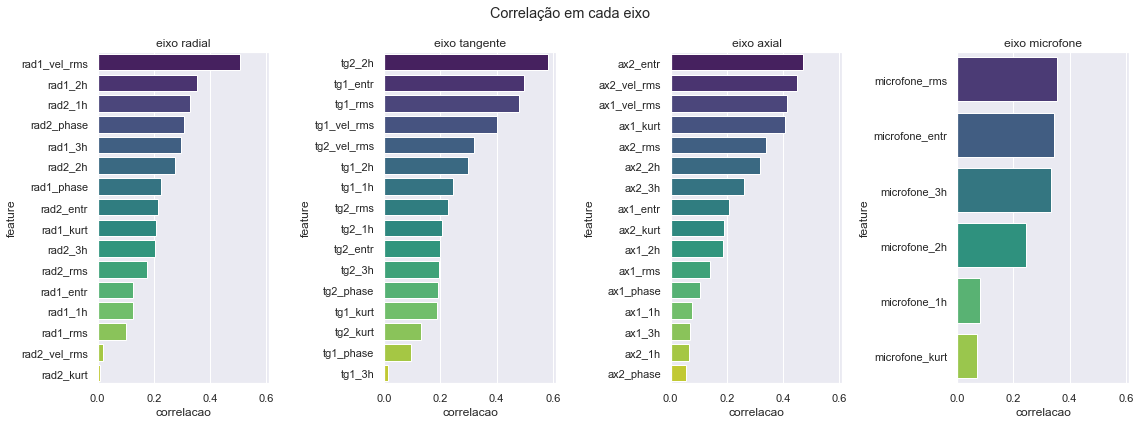

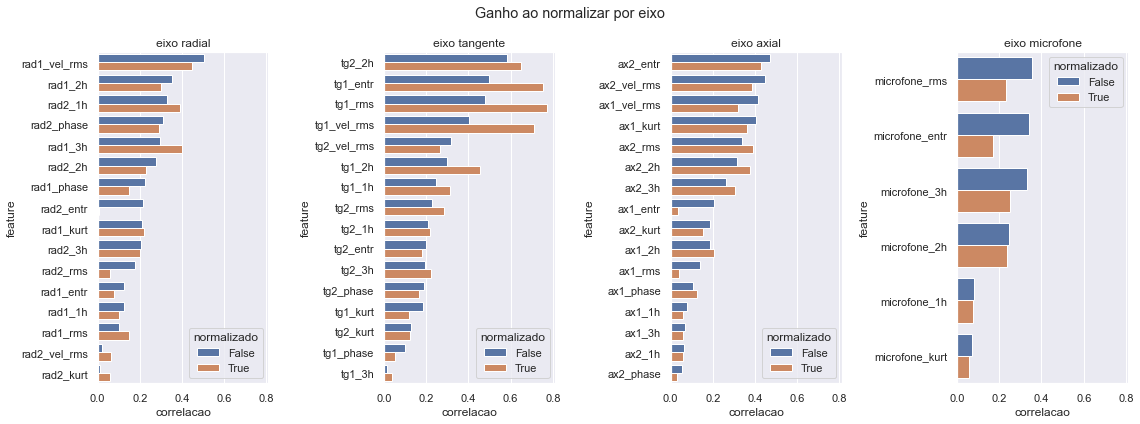

In [16]:
corr_df = aux.gera_corr_df('desalinhamento_horizontal', df_des_ho, df_des_ho_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

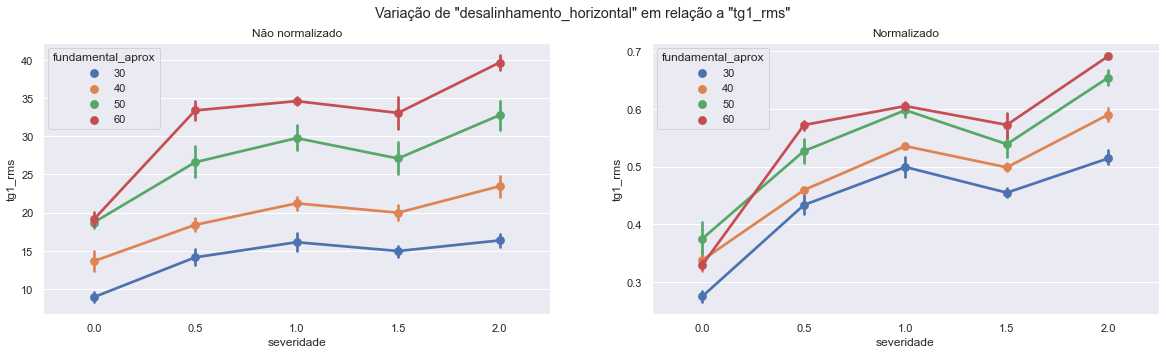

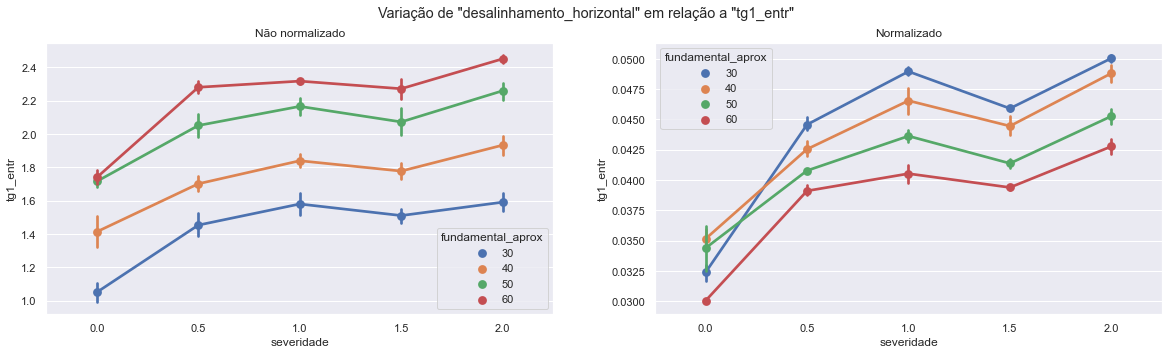

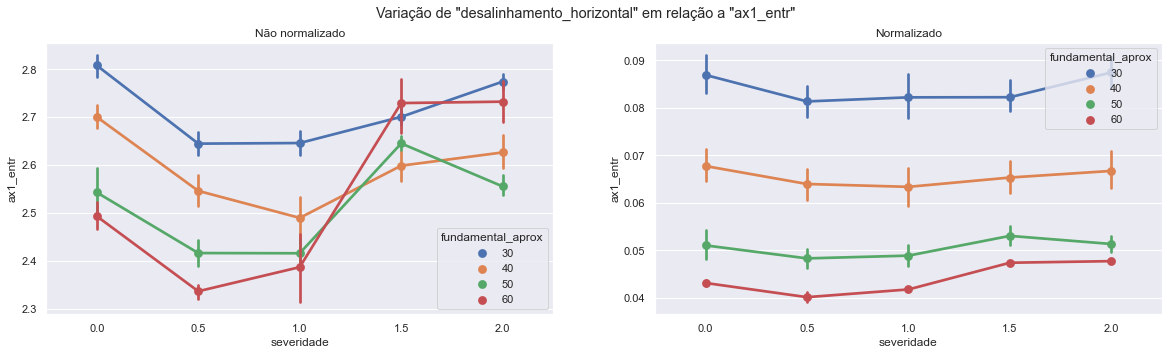

In [17]:
aux.plot_detailed_comparisson('tg1_rms', 'desalinhamento_horizontal', df_des_ho, df_des_ho_norm)
aux.plot_detailed_comparisson('tg1_entr', 'desalinhamento_horizontal', df_des_ho, df_des_ho_norm)
aux.plot_detailed_comparisson('ax1_entr', 'desalinhamento_horizontal', df_des_ho, df_des_ho_norm)

## Mudaças na correlação após normalização

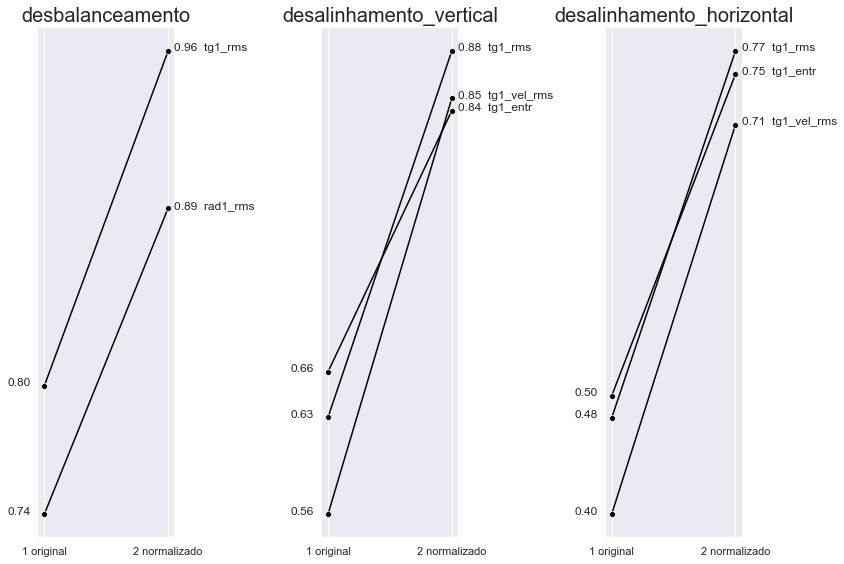

In [18]:
# plota maiores crescimentos 
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

aux.plot_change_correlation('desbalanceamento',          df_desbal, df_desbal_norm, ax=ax[0], cut=2)
aux.plot_change_correlation('desalinhamento_vertical',   df_des_ve, df_des_ve_norm, ax=ax[1])
aux.plot_change_correlation('desalinhamento_horizontal', df_des_ho, df_des_ho_norm, ax=ax[2])

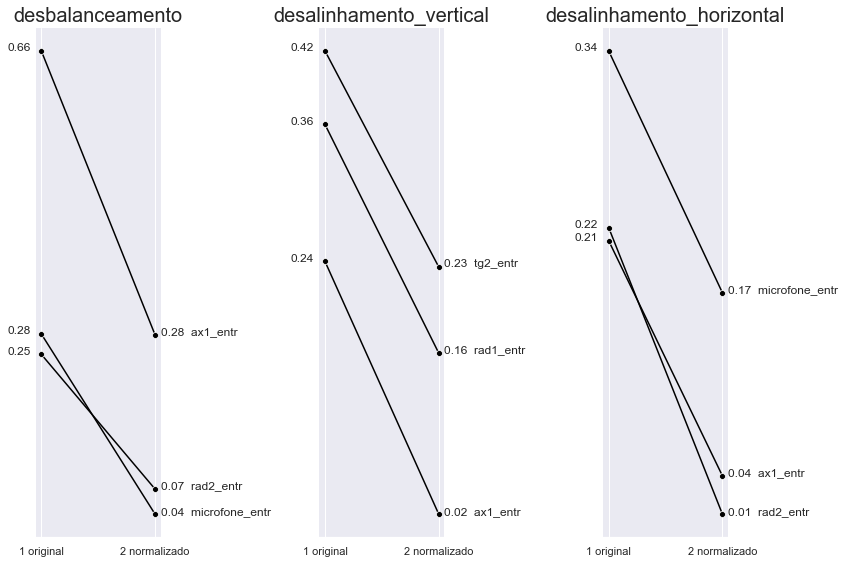

In [19]:
# plota maiores decrescimentos
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

aux.plot_change_correlation('desbalanceamento',          df_desbal, df_desbal_norm, decrescente=True, ax=ax[0])
aux.plot_change_correlation('desalinhamento_vertical',   df_des_ve, df_des_ve_norm, decrescente=True, ax=ax[1])
aux.plot_change_correlation('desalinhamento_horizontal', df_des_ho, df_des_ho_norm, decrescente=True, ax=ax[2])